<a href="https://colab.research.google.com/github/iqbal-waqar/Git-and-Github/blob/main/Task_1_ElevvoPathways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Student Score Prediction: Building a Regression Model to Predict Exam Performance Based on Study Habits"**

This project involves analyzing student performance data, cleaning and visualizing it, then building and evaluating linear and polynomial regression models to predict exam scores based on study hours and other factors. You'll learn data preprocessing, machine learning implementation, and model evaluation using Python libraries like Pandas, Matplotlib, and Scikit-learn

Bonus: Experiment with feature engineering and compare model performance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
from google.colab import files
uploaded = files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


# **Loading the Uploaded File**

In [5]:
df = pd.read_csv('StudentPerformanceFactors.csv')
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}\n")

Data loaded successfully!
Dataset shape: (6607, 20)



# **Exploring the Data**

In [6]:
print("📊 First 5 rows:")
print(df.head())

print("\n🔍 Basic statistics:")
print(df.describe())

print("\n🧐 Missing values:")
print(df.isnull().sum())

📊 First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \


# **Cleaning the Data**

In [7]:
df_clean = df.dropna()
print(f"\n🧹 Removed {len(df)-len(df_clean)} rows with missing values")


🧹 Removed 229 rows with missing values


# **DATA VISUALIZATION**

Text(0.5, 1.0, 'Hours_Studied Distribution')

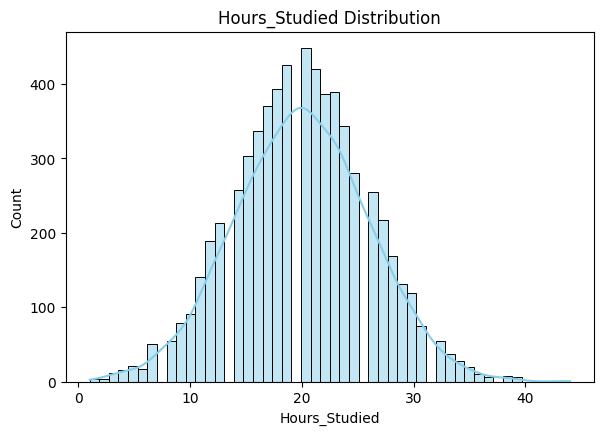

In [17]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df_clean['Hours_Studied'], kde=True, color='skyblue')
plt.title('Hours_Studied Distribution')

Text(0.5, 1.0, 'Exam Score Distribution')

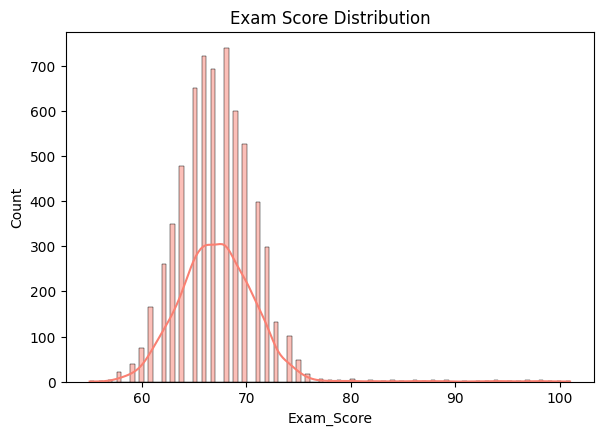

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(df_clean['Exam_Score'], kde=True, color='salmon')
plt.title('Exam Score Distribution')

Text(0.5, 1.0, 'Hours Studied vs Exam Score')

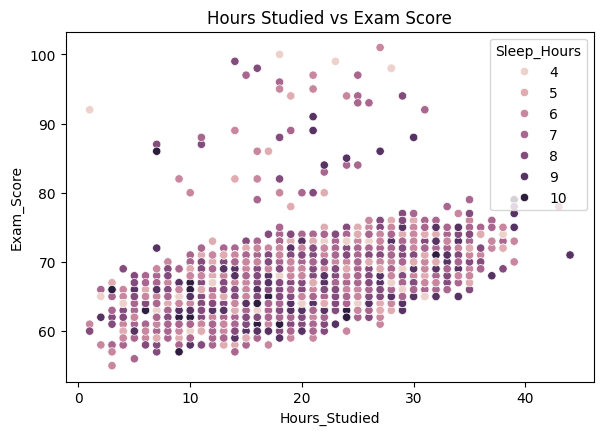

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df_clean, hue='Sleep_Hours')
plt.title('Hours Studied vs Exam Score')

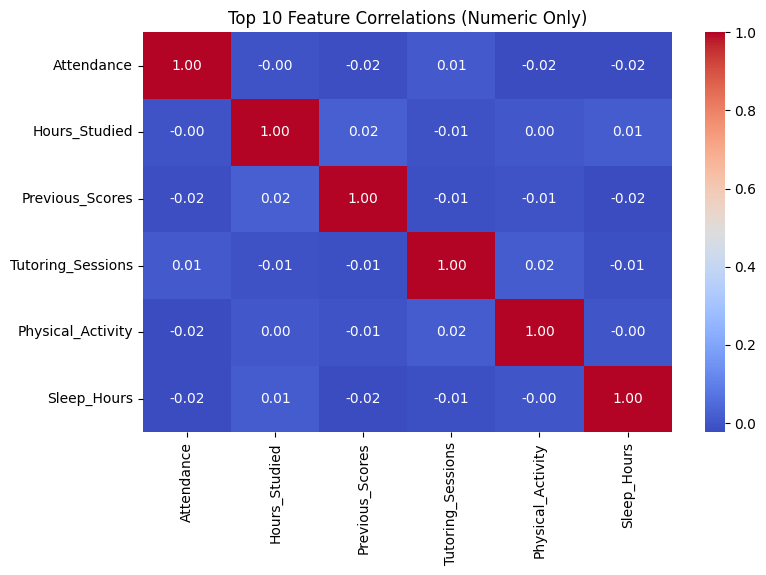

In [27]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr().abs()
top_features = corr_matrix['Exam_Score'].sort_values(ascending=False).index[1:11]
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Feature Correlations (Numeric Only)')

plt.tight_layout()
plt.show()

# **LINEAR REGRESSION**

In [28]:
X = df_clean[['Hours_Studied']]
y = df_clean['Exam_Score']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lin_reg.predict(X_test)

In [32]:
print("\n📈 LINEAR REGRESSION RESULTS:")
print(f"Coefficient: {lin_reg.coef_[0]:.2f}")
print(f"Intercept: {lin_reg.intercept_:.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


📈 LINEAR REGRESSION RESULTS:
Coefficient: 0.29
Intercept: 61.49
MSE: 12.35
R² Score: 0.21


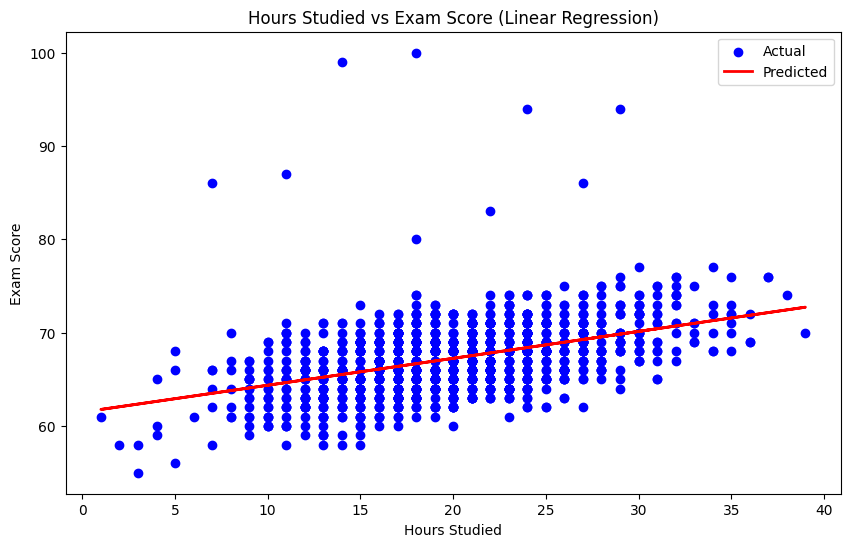

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Hours Studied vs Exam Score (Linear Regression)')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# **POLYNOMIAL REGRESSION (BONUS)**

In [34]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [35]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [36]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

In [37]:
print("\n📊 POLYNOMIAL REGRESSION RESULTS (Degree=2):")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.2f}")


📊 POLYNOMIAL REGRESSION RESULTS (Degree=2):
MSE: 12.35
R² Score: 0.21


In [39]:
X_test_hours = X_test['Hours_Studied'].values

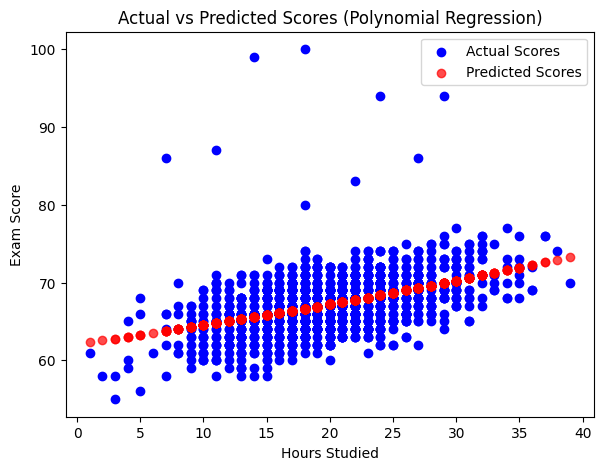

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test_hours, y_test, color='blue', label='Actual Scores')
plt.scatter(X_test_hours, y_pred_poly, color='red', label='Predicted Scores', alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Actual vs Predicted Scores (Polynomial Regression)')
plt.legend()

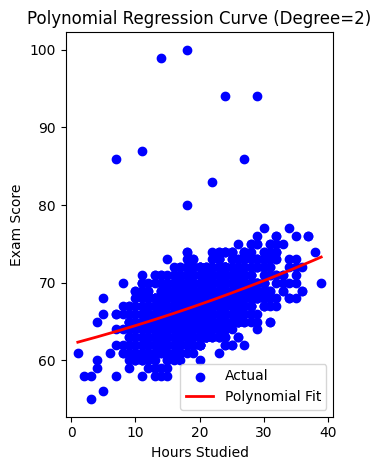

In [41]:
plt.subplot(1, 2, 2)
# Sort values for smooth curve
sorted_idx = np.argsort(X_test_hours)
plt.scatter(X_test_hours, y_test, color='blue', label='Actual')
plt.plot(X_test_hours[sorted_idx], y_pred_poly[sorted_idx], color='red', linewidth=2, label='Polynomial Fit')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Polynomial Regression Curve (Degree=2)')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
print("\n🔢 Polynomial Equation:")
print(f"Exam_Score = {poly_reg.intercept_:.2f} + {poly_reg.coef_[1]:.2f}*Hours + {poly_reg.coef_[2]:.2f}*Hours²")


🔢 Polynomial Equation:
Exam_Score = 62.13 + 0.22*Hours + 0.00*Hours²


# **MULTIPLE REGRESSION (BONUS)**

In [43]:
top_features = corr_matrix['Exam_Score'].sort_values(ascending=False).index[1:4]

In [44]:
X_multi = df_clean[['Hours_Studied'] + list(top_features)]
y_multi = df_clean['Exam_Score']

In [45]:
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [46]:
multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, y_train)
y_pred_multi = multi_reg.predict(X_test_multi)

In [47]:
print("\n📚 MULTIPLE REGRESSION RESULTS:")
print("Selected Features:", list(X_multi.columns))
print("\nCoefficients:")
for feature, coef in zip(X_multi.columns, multi_reg.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"Intercept: {multi_reg.intercept_:.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_multi):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_multi):.2f}")


📚 MULTIPLE REGRESSION RESULTS:
Selected Features: ['Hours_Studied', 'Attendance', 'Hours_Studied', 'Previous_Scores']

Coefficients:
  Hours_Studied: 0.15
  Attendance: 0.20
  Hours_Studied: 0.15
  Previous_Scores: 0.05
Intercept: 42.10
MSE: 6.48
R² Score: 0.58


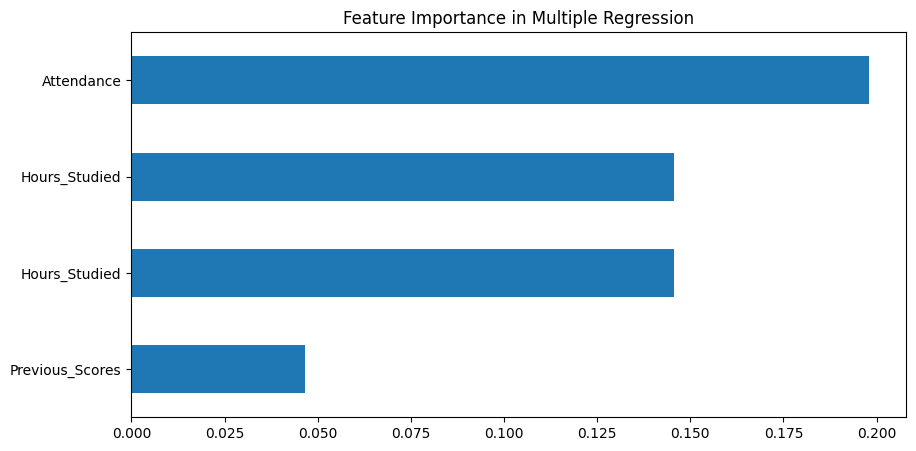

In [48]:
plt.figure(figsize=(10, 5))
importance = pd.Series(multi_reg.coef_, index=X_multi.columns).sort_values()
importance.plot(kind='barh')
plt.title('Feature Importance in Multiple Regression')
plt.show()

# **MODEL COMPARISON **

In [49]:
results = {
    'Model': ['Linear', 'Polynomial', 'Multiple'],
    'MSE': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_multi)
    ],
    'R²': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_multi)
    ]
}

In [50]:
results_df = pd.DataFrame(results)
print("\n🏆 FINAL MODEL COMPARISON:")
print(results_df)


🏆 FINAL MODEL COMPARISON:
        Model        MSE        R²
0      Linear  12.351734  0.205131
1  Polynomial  12.352544  0.205078
2    Multiple   6.478081  0.583117


# **PREDICTION EXAMPLE**

In [53]:
feature_order = X_multi.columns.tolist()

In [54]:
sample_input = pd.DataFrame({
    'Hours_Studied': [20],
    'Attendance': [80],
    'Previous_Scores': [75]
})[feature_order]


In [55]:
print("\n🔮 Sample Prediction:")
print("Input Features:")
print(sample_input)


🔮 Sample Prediction:
Input Features:
   Hours_Studied  Attendance  Hours_Studied  Previous_Scores
0             20          80             20               75


In [56]:
predicted_score = multi_reg.predict(sample_input)[0]
print(f"\nPredicted Exam Score: {predicted_score:.1f}")


Predicted Exam Score: 67.3
